In [28]:
import os
import json
import cv2
import matplotlib.pyplot as plt

dir = './data/'
for region in os.list
files = list(set([file.split('.')[0] for file in os.listdir(dir)]))


['qFE6kyyxNTEuVJR1uHha4A', 'f82itz69069z_LC7xM6UIA']


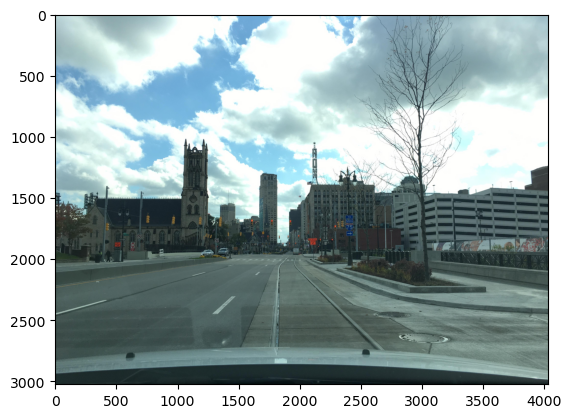

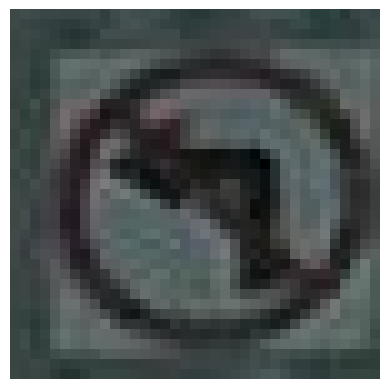

regulatory--no-left-turn--g1


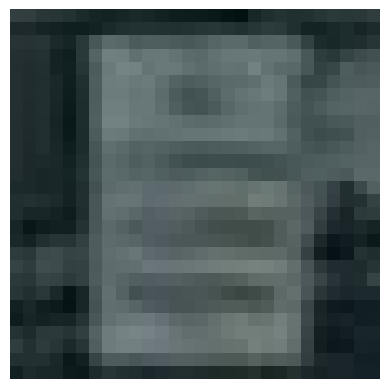

other-sign


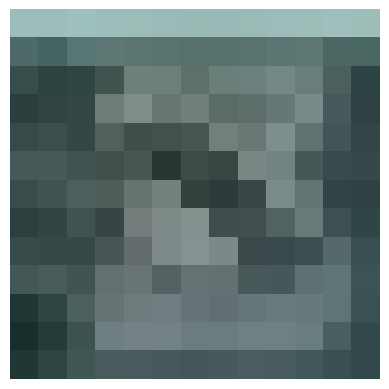

other-sign


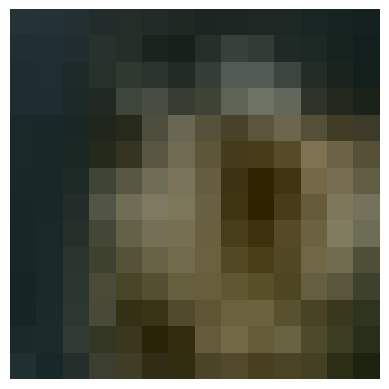

other-sign


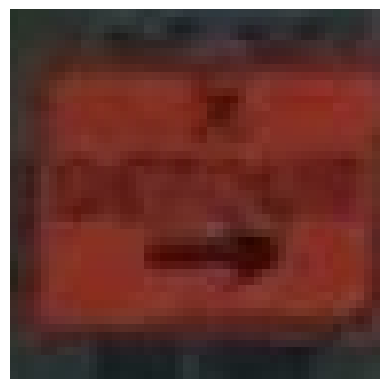

other-sign


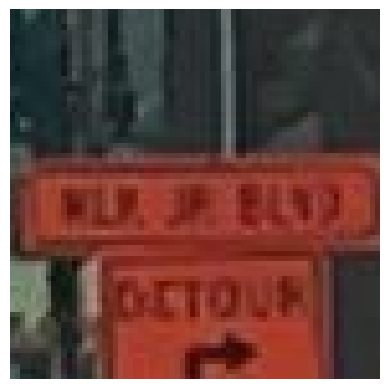

other-sign


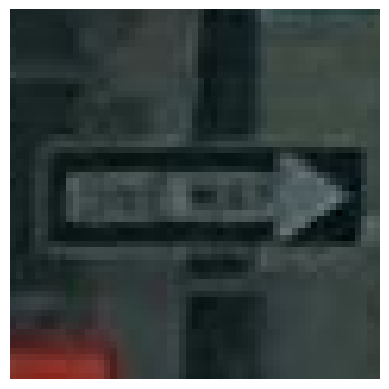

regulatory--one-way-right--g3


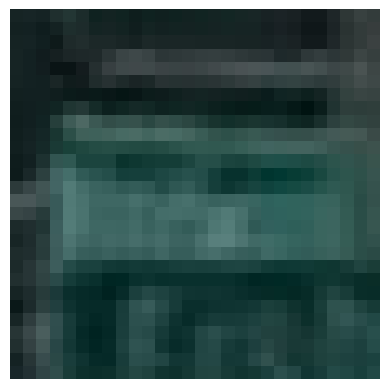

other-sign


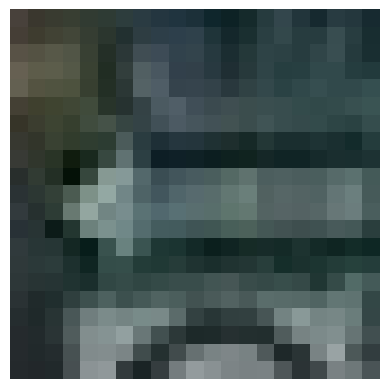

other-sign


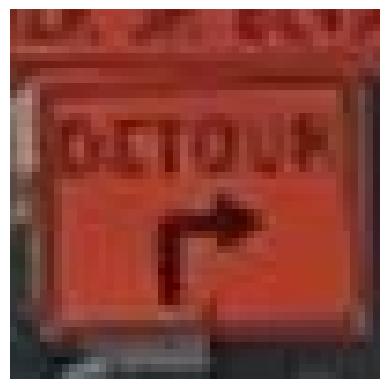

other-sign


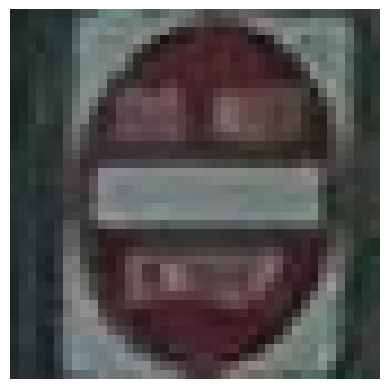

regulatory--no-entry--g1


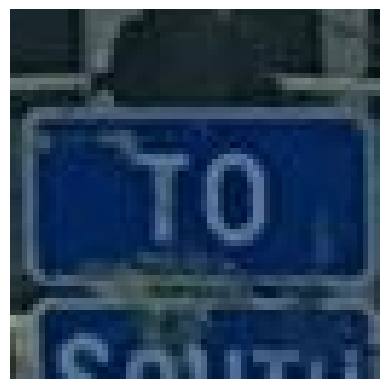

other-sign


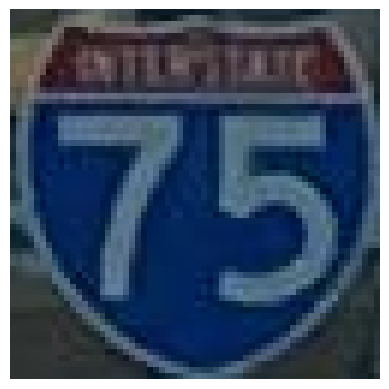

other-sign


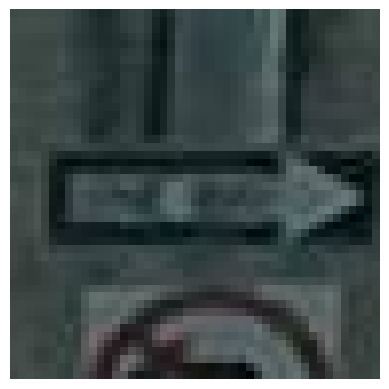

regulatory--one-way-right--g3


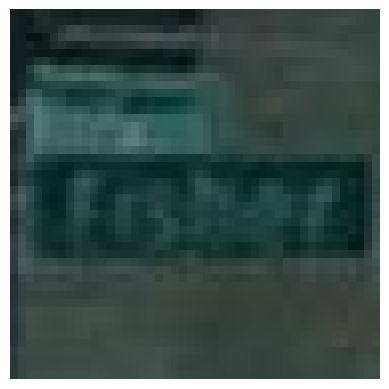

other-sign


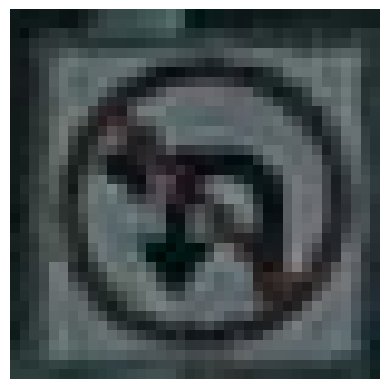

other-sign


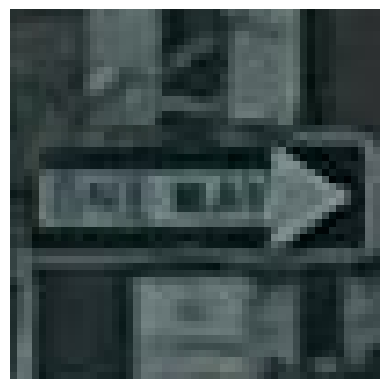

regulatory--one-way-right--g3


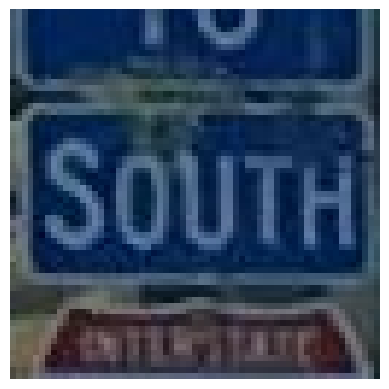

other-sign


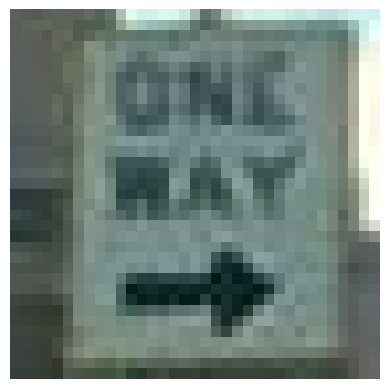

regulatory--one-way-right--g2


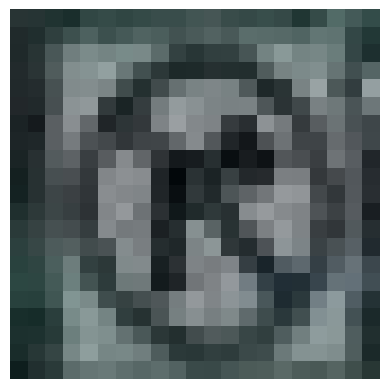

regulatory--no-right-turn--g1


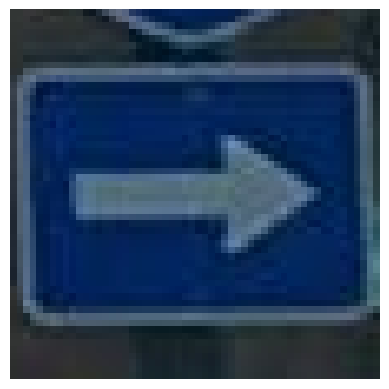

regulatory--one-way-right--g1


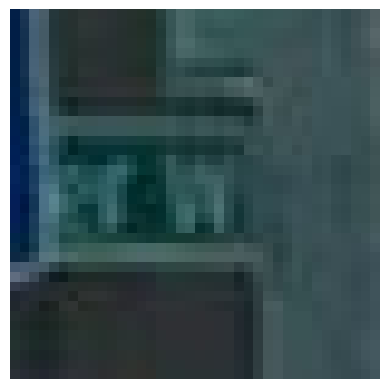

other-sign


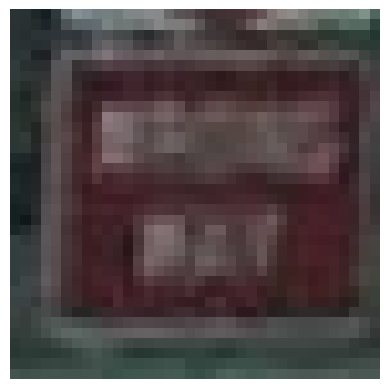

regulatory--wrong-way--g1


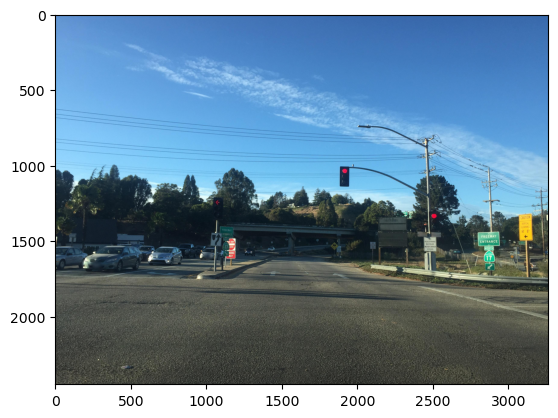

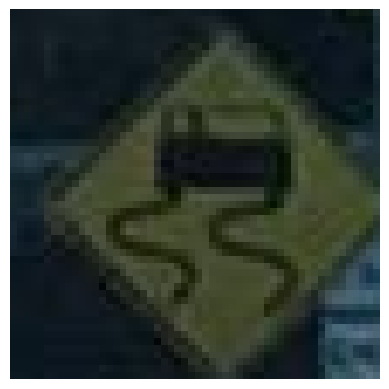

warning--slippery-road-surface--g2


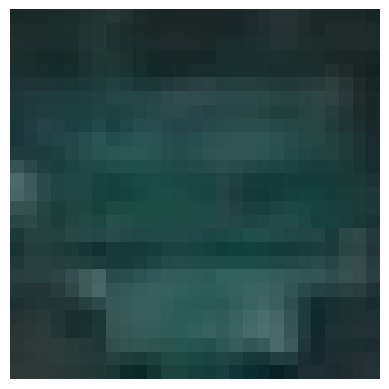

other-sign


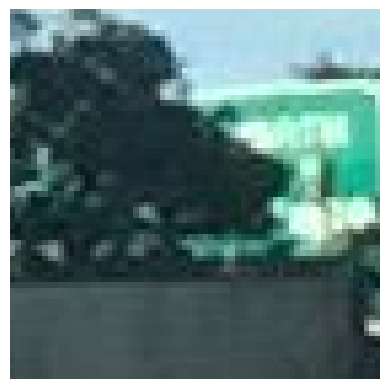

other-sign


ValueError: zero-size array to reduction operation minimum which has no identity

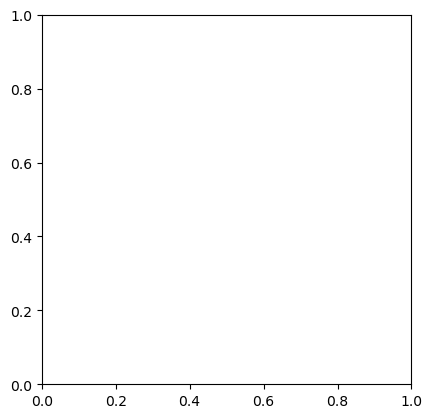

In [57]:
for file in files:
    with open(os.path.join(dir, file + '.json')) as f:
        info = json.load(f)
    width = info['width']
    height = info['height']
    objects = info['objects']

    img = cv2.imread(os.path.join(dir, file + '.jpg'))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

    csv = [['key', 'label'] + list(objects[0]['properties'].keys())]
    # ['key', 'label','ambiguous','dummy','direction-or-information','barrier','occluded','out-of-frame','exterior','included','highway']

    for i in range(len(objects)):
        box = objects[i]['bbox']
        xmin, xmax, ymin, ymax = int(box['xmin']), int(box['xmax']), int(box['ymin']), int(box['ymax'])
        x_len = xmax - xmin
        y_len = ymax - ymin
        
        if y_len > x_len:
            diff = y_len - x_len
            xmin -= diff//2
            xmax += diff - diff//2
        if y_len < x_len:
            diff = - y_len + x_len
            ymin -= diff//2
            ymax += diff - diff//2
        
        cropped_image = img[ymin:ymax, xmin:xmax] 
        plt.imshow(cropped_image)
        plt.axis('off')
        plt.show()
        print(objects[i]['label'])
        cv2.imwrite(f'./extracted/{objects[i]["key"]}.png', cropped_image)
        csv_row = [objects[i]["key"], objects[i]['label']] + list(objects[0]['properties'].values())
        csv.append(csv_row)
